In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
df = pd.read_csv('zomato.csv', encoding='ISO-8859–1')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
dc = pd.read_excel('Country-Code.xlsx')

In [5]:
dc.reset_index()

,index,Country Code,Country
0,0,1,India
1,1,14,Australia
2,2,30,Brazil
3,3,37,Canada
4,4,94,Indonesia
5,5,148,New Zealand
6,6,162,Phillipines
7,7,166,Qatar
8,8,184,Singapore
9,9,189,South Africa


In [6]:
df_grand = df.merge(dc, on='Country Code', how='outer')

In [7]:
df_grand.drop('Country Code', axis=1, inplace=True)

In [8]:
df_grand.dropna(inplace=True)

In [9]:
df_grand.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [10]:
df_grand['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9542, dtype: object

In [11]:
df_grand['Cuisines'] = df_grand['Cuisines'].str.split(', ')

In [12]:
# mlb = MultiLabelBinarizer()
# mlb_fit = mlb.fit( df_grand['Cuisines'] )

In [13]:
# df_tags = pd.DataFrame(mlb_fit.transform( df_grand['Cuisines'] ), columns = mlb_fit.classes_, index = df_grand.index)
# df_tags.head()

In [14]:
# df_grand = df_grand.merge(df_tags, left_index=True, right_index=True)

In [15]:
df_grand

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"[French, Japanese, Desserts]",1100,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,[Japanese],1200,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"[Seafood, Asian, Filipino, Indian]",4000,...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"[Japanese, Sushi]",1500,...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"[Japanese, Korean]",1500,...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,[Turkish],80,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"[World Cuisine, Patisserie, Cafe]",105,...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"[Italian, World Cuisine]",170,...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,[Restaurant Cafe],120,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [16]:
df_grand['City'] = df_grand['City'].replace(to_replace='ÛÁstanbul', value='Istanbul')

In [17]:
df_grand['City'] = df_grand['City'].replace(to_replace='Brasí_lia', value='Brasilia')

In [18]:
df_grand.isna().any()

Restaurant ID           False
Restaurant Name         False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                False
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
Country                 False
dtype: bool

In [19]:
df_grand.drop(columns=['Locality Verbose', 'Rating color'], inplace=True)

In [20]:
df_grand['Rating text'].value_counts()

Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: Rating text, dtype: int64

In [21]:
rating_map = {'Excellent': 5,
              'Very Good': 4,
              'Good': 3,
              'Average': 2,
              'Poor': 1,
              'Not rated': 0}

In [22]:
df_grand['Rating text'].replace(rating_map, inplace=True)

In [23]:
df_grand['Rating text'].value_counts()

2    3734
0    2148
3    2096
4    1078
5     300
1     186
Name: Rating text, dtype: int64

In [24]:
df_grand['Currency'].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  473
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

In [25]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [26]:
df['Average Cost for two'].describe()

count      9551.000000
mean       1199.210763
std       16121.183073
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64

In [27]:
df[df['Average Cost for two']==800000]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9283,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.1,Green,Very Good,1498
9284,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.6,Dark Green,Excellent,873


In [28]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [29]:
yesno_map = {'Yes': 1,
             'No': 0}

In [30]:
df_grand['Has Table booking'].replace(yesno_map, inplace=True)

In [31]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [32]:
df_grand['Has Online delivery'].replace(yesno_map, inplace=True)

In [33]:
df_grand['Is delivering now'].replace(yesno_map, inplace=True)

In [34]:
df_grand['Switch to order menu'].value_counts()

No    9542
Name: Switch to order menu, dtype: int64

In [35]:
df_grand.drop(columns='Switch to order menu', inplace=True)

In [36]:
df_grand.dtypes

Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking         int64
Has Online delivery       int64
Is delivering now         int64
Price range               int64
Aggregate rating        float64
Rating text               int64
Votes                     int64
Country                  object
dtype: object

In [37]:
rate_map = {'Botswana Pula(P)': 0.090, 
            'Brazilian Real(R$)': 0.22, 
            'Dollar($)': 1,
            'Emirati Diram(AED)': 0.27, 
            'Indian Rupees(Rs.)': 0.013,
            'Indonesian Rupiah(IDR)': 0.000070, 
            'NewZealand($)': 0.64, 
            'Pounds(\x8c£)': 1.30,
            'Qatari Rial(QR)': 0.27, 
            'Rand(R)': 0.064, 
            'Sri Lankan Rupee(LKR)': 0.0055,
            'Turkish Lira(TL)': 0.16}

In [38]:
dict1 = rate_map
df_grand.loc[df_grand['Currency'].isin(dict1.keys()), 'aa'] = df_grand['Currency'].map(dict1)
df_grand['bb'] = df_grand['aa'] * df_grand['Average Cost for two']

In [39]:
df_grand.drop(columns='aa', inplace=True)

In [40]:
df_grand.rename(columns={'bb': 'Average Cost for two in USD'}, inplace=True)

In [41]:
df_grand.to_csv('~/Desktop/zomato_cleaned.csv')

In [42]:
df_grand[['Cuisine1',
          'Cuisine2',
          'Cuisine3',
          'Cuisine4',
          'Cuisine5',
          'Cuisine6',
          'Cuisine7',
          'Cuisine8']] = pd.DataFrame(df_grand.Cuisines.values.tolist(), index= df_grand.index)

In [43]:
df_grand

,Restaurant ID,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,...,Country,Average Cost for two in USD,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"[French, Japanese, Desserts]",1100,Botswana Pula(P),...,Phillipines,99.0,French,Japanese,Desserts,None,None,None,None,None
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,[Japanese],1200,Botswana Pula(P),...,Phillipines,108.0,Japanese,None,None,None,None,None,None,None
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"[Seafood, Asian, Filipino, Indian]",4000,Botswana Pula(P),...,Phillipines,360.0,Seafood,Asian,Filipino,Indian,None,None,None,None
3,6318506,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"[Japanese, Sushi]",1500,Botswana Pula(P),...,Phillipines,135.0,Japanese,Sushi,None,None,None,None,None,None
4,6314302,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"[Japanese, Korean]",1500,Botswana Pula(P),...,Phillipines,135.0,Japanese,Korean,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,Istanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,28.977392,41.022793,[Turkish],80,Turkish Lira(TL),...,Turkey,12.8,Turkish,None,None,None,None,None,None,None
9547,5908749,Ceviz AÛôacÛ±,Istanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,29.041297,41.009847,"[World Cuisine, Patisserie, Cafe]",105,Turkish Lira(TL),...,Turkey,16.8,World Cuisine,Patisserie,Cafe,None,None,None,None,None
9548,5915807,Huqqa,Istanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,29.034640,41.055817,"[Italian, World Cuisine]",170,Turkish Lira(TL),...,Turkey,27.2,Italian,World Cuisine,None,None,None,None,None,None
9549,5916112,Aôôk Kahve,Istanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,29.036019,41.057979,[Restaurant Cafe],120,Turkish Lira(TL),...,Turkey,19.2,Restaurant Cafe,None,None,None,None,None,None,None


In [44]:
df_grand.to_csv('~/Desktop/zomato_cleaned.csv')

In [81]:
df_grand['rating_universal'] = ((df_grand['Aggregate rating']/df['Price range']).round(2))
+ df_grand['Has Table booking'] 
+ df_grand['Has Online delivery'] + df_grand['Is delivering now'] + df_grand['Votes']

0        314
1        591
2        270
3        365
4        229
        ... 
9546     788
9547    1034
9548     661
9549     901
9550     591
Length: 9542, dtype: int64

ValueError: supplied range of [-inf, 13.770929596755142] is not finite

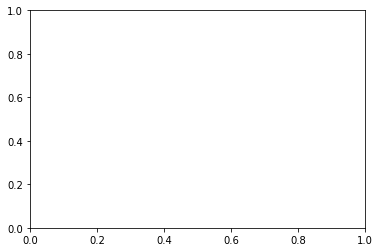

In [78]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_grand['rating_universal'].hist()

In [61]:
## Sort rating_universal, and rank them in new column

df_grand['ranking_universal'] = df_grand["rating_universal"].rank(method ='min')

In [71]:
df_grand[df_grand['Aggregate rating']==0].shape

(2148, 30)

In [72]:
df_grand.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating text', 'Votes', 'Country',
       'Average Cost for two in USD', 'Cuisine1', 'Cuisine2', 'Cuisine3',
       'Cuisine4', 'Cuisine5', 'Cuisine6', 'Cuisine7', 'Cuisine8',
       'Ranking_universal', 'rating_universal', 'ranking_universal'],
      dtype='object')